<h1>Venda de jogos de videogames na História</h1>
<br>
Esta apresentação foi criada por <b>Juvenal Cristiano</b>. Aqui iremos demonstrar algumas análises sobre os dados encontrados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')



In [10]:
#leitura do arquivo
videogames = pd.read_csv('vgsales.csv')

In [13]:
#Exibindo as 10 primeiras linhas do Dataframe
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [15]:
#Resumo de informações em todos as colunas
videogames.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [16]:
#Tipo de dado em cada coluna
videogames.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [17]:
#Quantidade de linhas e colunas no Dataframe
videogames.shape

(16598, 11)

In [19]:
#Renomeando Colunas
videogames.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [22]:
#Visualizando seus dados
videogames['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [23]:
#Plotando um gráfico
titulos_lancados = videogames['Platform'].value_counts()


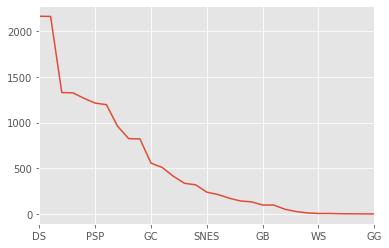

In [24]:
titulos_lancados.plot()

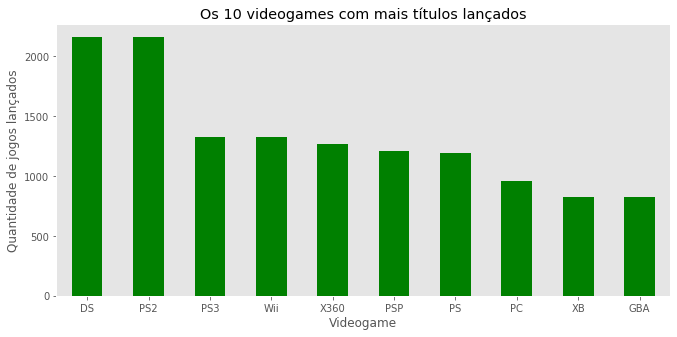

In [30]:
#Criando um gráfico utilizando apenas uma linha de código
videogames['Platform'].value_counts().head(10).plot(kind='bar',figsize=(11,5),grid = False, rot= 0, color = 'green'
)
#Enfeitando o gráfico
plt.title('Os 10 videogames com mais títulos lançados')
plt.xlabel('Videogame')
plt.ylabel('Quantidade de jogos lançados')
plt.show()

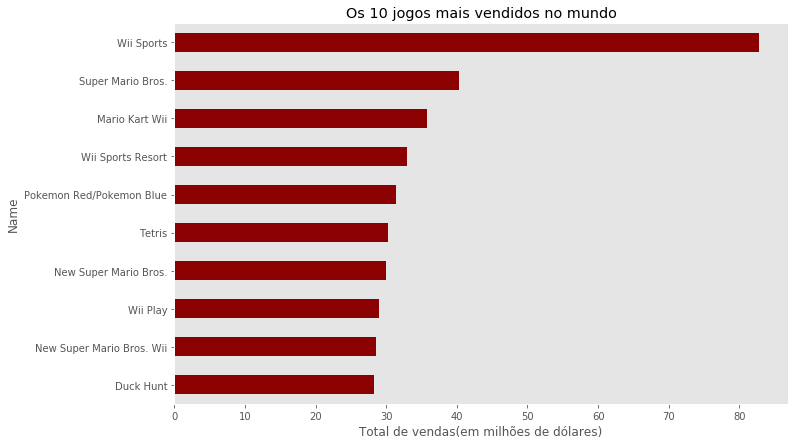

In [36]:
#Os 10 jogos mais vendidos da história
top_10_vendidos = videogames[['Name','Global_Sales']].head(10).set_index('Name').sort_values('Global_Sales', ascending=True)
top_10_vendidos.plot(kind='barh', figsize=(11,7), grid=False, color='darkred', legend=False)

plt.title('Os 10 jogos mais vendidos no mundo')
plt.xlabel('Total de vendas(em milhões de dólares)')
plt.show()

In [39]:
crosstab_vg = pd.crosstab(videogames['Platform'], videogames['Genre'])
crosstab_vg.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


In [42]:
crosstab_vg['Rank']= crosstab_vg.sum(axis=1)
crosstab_vg.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Rank
Platform,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,182,37,14,53,28,20,11,86,7,30,26,15,509
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163


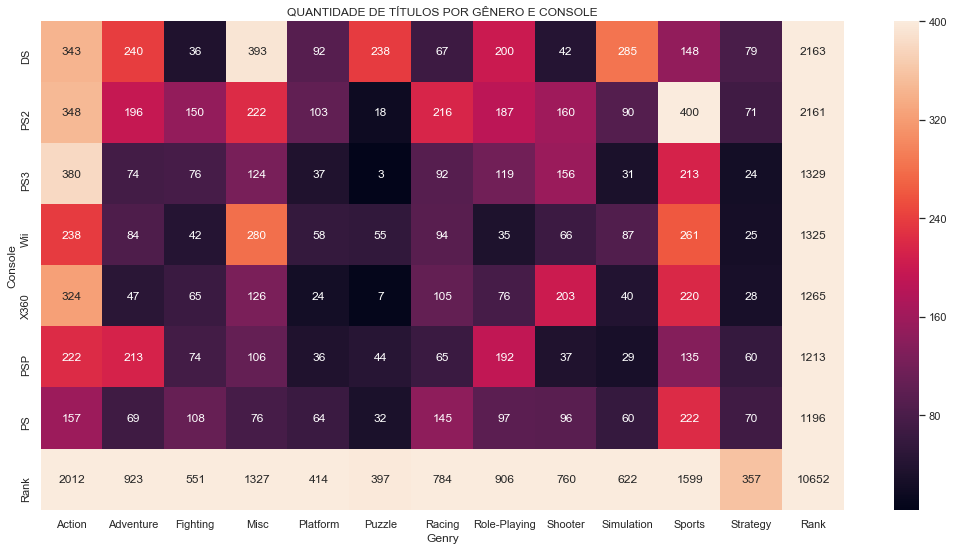

In [53]:
#Criando um mapa de calor
top10_platforms = crosstab_vg[crosstab_vg['Rank']>1000].sort_values('Rank', ascending = False)
top10_final = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns = ['Rank']).T, ignore_index = False)

sns.set(font_scale = 1)
plt.figure(figsize=(18,9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.loc[:'PS', :'Strategy'].values.max(), vmin=top10_final.loc[:, :'Strategy'].values.min(), fmt='d')
plt.xlabel('Genry')
plt.ylabel('Console')
plt.title('QUANTIDADE DE TÍTULOS POR GÊNERO E CONSOLE')
plt.show()